# 9. Statistics & supervised machine learning

Explanation vs. prediction

TO DECIDE
- ...

### Text book

- Computer Age Statistical Inference

### Notes

- Check https://doi.org/10.1145/1150402.1150412


## 9.1. Explanation (statistical modeling)

- model fit r^2
- variable transformation
- hypothesis and significance testing
- generalized linear model: linear and logistic regression

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

#### Data

In [2]:
import pandas as pd

In [4]:
vdem_fh = pd.read_csv('./vdem_fh_combined.csv')
vdem = pd.read_csv('./vdem_only.csv')

In [5]:
vdem_fh.head()

,Country,Total Score,Status,country_name,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,v2x_regime,v2smgovdom_osp,v2smgovfilprc_osp,v2smgovsmcenprc_osp,v2smonper_osp,v2smarrest_osp,e_regionpol
0,Angola,64,Partly Free,Angola,2019,0.386,0.230,0.105,0.260,0.148,1.0,2.441,2.969,3.924,2.883,1.995,4
1,Argentina,72,Free,Argentina,2019,0.812,0.631,0.527,0.635,0.592,2.0,3.340,3.847,3.930,3.321,2.605,2
2,Armenia,76,Free,Armenia,2019,0.805,0.641,0.532,0.706,0.656,1.0,2.926,3.714,3.915,3.293,2.493,1
3,Australia,77,Free,Australia,2019,0.838,0.789,0.602,0.737,0.706,3.0,2.878,3.829,3.876,3.300,2.684,5
4,Azerbaijan,39,Not Free,Azerbaijan,2019,0.206,0.070,0.072,0.047,0.118,1.0,0.384,1.231,2.672,1.558,0.777,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_theme(style='darkgrid')

In [8]:
indicators_regression = ['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']

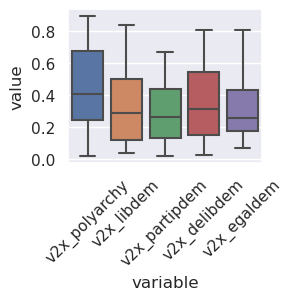

In [9]:
plt.figure(figsize=[2.5, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem_fh[indicators_regression].melt()
)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

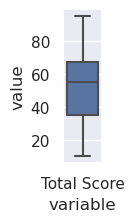

In [10]:
plt.figure(figsize=[.5, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem_fh[['Total Score']].melt()
)

### 9.1.1. Regression

#### Correlations

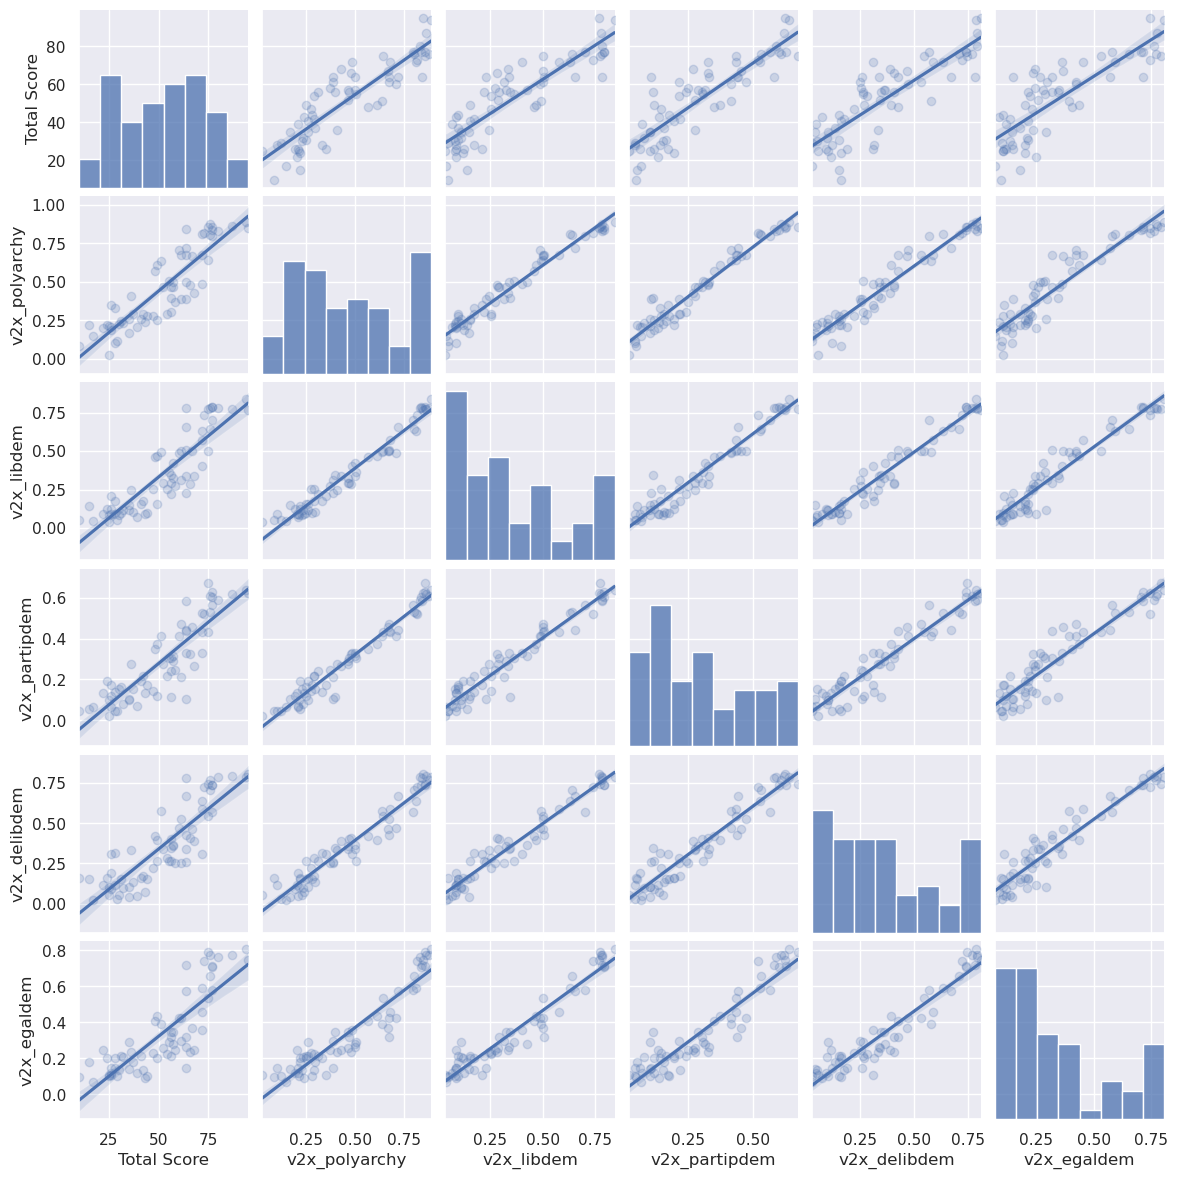

In [11]:
fig = sns.pairplot(
    data = vdem_fh[['Total Score', 'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']], 
    #hue = 'v2x_regime', 
    height = 2, 
    kind = 'reg', 
    diag_kind = 'hist', 
    plot_kws = {'scatter_kws': {'alpha': .2}}
)
#fig.savefig('.............vdem_fh_pairplot.png')
plt.show()

#### Ordinary-Least-Squares regression

In [12]:
standardize = False

In [13]:
X_vdem_fh = vdem_fh[indicators_regression].to_numpy()
y_vdem_fh = vdem_fh[['Total Score']].to_numpy()

if standardize:
    from sklearn.preprocessing import StandardScaler
    
    X_vdem_fh = StandardScaler().fit_transform(X_vdem_fh)
    y_vdem_fh = StandardScaler().fit_transform(y_vdem_fh)
    
    fit_intercept = False
else:
    fit_intercept = True

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
ols_vdem_fh = LinearRegression(fit_intercept=fit_intercept)

In [16]:
ols_vdem_fh_fit = ols_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

Goodness of fit (R^2)

In [17]:
ols_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7902823278954166

Intercept

In [18]:
ols_vdem_fh_fit.intercept_

array([23.34152179])

Coefficients

In [19]:
ols_vdem_fh_fit.coef_[0]

array([ 32.54042368,  55.61438425,  15.09680851,  -6.88939045,
       -23.61813015])

Significance? Not with sklearn!

#### Statsmodels

In [20]:
import statsmodels.api as sm

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [21]:
X_vdem_fh_ = sm.add_constant(X_vdem_fh)

In [22]:
if standardize:
    ols_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
else:
    ols_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_) # equivalent to fit_intercept=True (https://stackoverflow.com/questions/70179307/why-is-sklearn-r-squared-different-from-that-of-statsmodels-when-fit-intercept-f/70180217#70180217)
ols_vdem_fh_sm_fit = ols_vdem_fh_sm.fit()

In [23]:
ols_vdem_fh_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     44.47
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           8.88e-19
Time:                        09:14:49   Log-Likelihood:                -237.78
No. Observations:                  65   AIC:                             487.6
Df Residuals:                      59   BIC:                             500.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3415      3.857      6.051      0.000      15.623      31.060
x1            32.5404     30.961      1.051      0.298     -29.412      94.493
x2            55.6144     34.372      1.618      0.111     -13.165     124.393
x3            15.0968     31.837      0.474      0.637     -48.610      78.803
x4            -6.8894     23.333     -0.295      0.769     -53.578      39.799
x5           -23.6181     21.703     -1.088      0.281     -67.045      19.809
==============================================================================
Omnibus:                        2.813   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.605
Skew:                           0.016   Prob(JB):                        0.448
Kurtosis:                       2.231   Cond. No.                         46.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# goodness of fit (R^2)
ols_vdem_fh_sm_fit.rsquared
#ols_vdem_fh_sm_fit.rsquared_adj

0.7902823278954166

In [25]:
# intercept and coefficients
ols_vdem_fh_sm_fit.params

array([ 23.34152179,  32.54042368,  55.61438425,  15.09680851,
        -6.88939045, -23.61813015])

In [26]:
# significance scores
ols_vdem_fh_sm_fit.pvalues

array([1.06415397e-07, 2.97535245e-01, 1.10997548e-01, 6.37117791e-01,
       7.68824862e-01, 2.80906105e-01])

In [27]:
import numpy as np

In [28]:
def format_coef(df, coef, pvalues=None):
    df[coef] = df[coef].apply(lambda x: '{0:.2f}'.format(x))
    if pvalues is not None:
        def stars(cell):
            if cell <= .001:
                cell = '***'
            elif cell <= .01:
                cell = '**'
            elif cell <= .1:
                cell = '*'
            else:
                cell = ''
            return cell
        df['pvalues'] = pvalues
        df['stars'] = df['pvalues'].apply(stars)
        df[coef] = df[coef] + df['stars']
        del df['pvalues']
        del df['stars']
    return df

In [29]:
if standardize:
    vdem_fh_regression = pd.DataFrame(
        data = ols_vdem_fh_sm_fit.params, 
        index = indicators_regression, 
        columns = ['OLS']
    )
else:
    vdem_fh_regression = pd.DataFrame(
        data = ols_vdem_fh_sm_fit.params, 
        index = np.concatenate([['intercept'], indicators_regression]), 
        columns = ['OLS']
    )
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='OLS', pvalues=ols_vdem_fh_sm_fit.pvalues)
vdem_fh_regression

,OLS
intercept,23.34***
v2x_polyarchy,32.54
v2x_libdem,55.61
v2x_partipdem,15.10
v2x_delibdem,-6.89
v2x_egaldem,-23.62


#### Ridge regression to deal with collinearity

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_vdem_fh = Ridge(alpha=1., fit_intercept=fit_intercept, random_state=42)

In [32]:
ridge_vdem_fh_fit = ridge_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

In [33]:
# goodness of fit
ridge_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7736828263938498

In [34]:
# intercept
ridge_vdem_fh_fit.intercept_

array([24.57530599])

In [35]:
# coefficients
ridge_vdem_fh_fit.coef_[0]

array([20.3224907 , 18.53938774, 14.21497605, 12.84013467,  7.71160108])

Significance scores are meaningless with regularization (https://stats.stackexchange.com/questions/224796/why-are-confidence-intervals-and-p-values-not-reported-as-default-for-penalized)

In [36]:
if standardize:
    vdem_fh_regression['Ridge'] = ridge_vdem_fh_fit.coef_[0] # ridge_vdem_fh_sm_fit.params
else:
    vdem_fh_regression['Ridge'] = np.concatenate([ridge_vdem_fh_fit.intercept_, ridge_vdem_fh_fit.coef_[0]])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='Ridge', pvalues=None)
vdem_fh_regression

,OLS,Ridge
intercept,23.34***,24.58
v2x_polyarchy,32.54,20.32
v2x_libdem,55.61,18.54
v2x_partipdem,15.10,14.21
v2x_delibdem,-6.89,12.84
v2x_egaldem,-23.62,7.71


Ridge regression using statsmodels, just for completeness (requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression):

In [37]:
n = vdem_fh.shape[0]
if standardize:
    ridge_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
    penalty = np.ones(len(indicators_regression)) / n

else:
    ridge_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_)
    penalty = np.concatenate([[0.], np.ones(len(indicators_regression))]) / n

ridge_vdem_fh_sm_fit = ridge_vdem_fh_sm.fit_regularized(alpha=penalty, L1_wt=0.)
ridge_vdem_fh_sm_fit.params

array([24.57530599, 20.3224907 , 18.53938774, 14.21497605, 12.84013467,
        7.71160108])

#### Lasso regression to automatically select variables

In [38]:
alpha_lasso = 1. # if alpha < 1. then Lasso becomes Elastic Net (https://stats.stackexchange.com/questions/319861/how-to-interpret-lasso-shrinking-all-coefficients-to-0)

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_vdem_fh = Lasso(alpha=alpha_lasso, fit_intercept=fit_intercept, random_state=42)

In [41]:
lasso_vdem_fh_fit = lasso_vdem_fh.fit(X_vdem_fh, y_vdem_fh)

In [42]:
# goodness of fit
lasso_vdem_fh_fit.score(X_vdem_fh, y_vdem_fh)

0.7461837725999856

In [43]:
# intercept
lasso_vdem_fh_fit.intercept_

array([27.80141612])

In [44]:
# coefficients
lasso_vdem_fh_fit.coef_

array([37.53608076, 19.18122251,  0.        ,  0.        ,  0.        ])

In [45]:
if standardize:
    vdem_fh_regression['Lasso'] = lasso_vdem_fh_fit.coef_
else:
    vdem_fh_regression['Lasso'] = np.concatenate([lasso_vdem_fh_fit.intercept_, lasso_vdem_fh_fit.coef_])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='Lasso', pvalues=None)
vdem_fh_regression

,OLS,Ridge,Lasso
intercept,23.34***,24.58,27.80
v2x_polyarchy,32.54,20.32,37.54
v2x_libdem,55.61,18.54,19.18
v2x_partipdem,15.10,14.21,0.00
v2x_delibdem,-6.89,12.84,0.00
v2x_egaldem,-23.62,7.71,0.00


Lasso regression using statsmodels, just for completeness (requires setting scaling penalties: https://stackoverflow.com/questions/72260808/mismatch-between-statsmodels-and-sklearn-ridge-regression):

In [46]:
if standardize:
    lasso_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh)
    penalty = np.ones(len(indicators_regression))*alpha_lasso
else:
    lasso_vdem_fh_sm = sm.OLS(y_vdem_fh, X_vdem_fh_)
    penalty = np.concatenate([[0.], np.ones(len(indicators_regression))*alpha_lasso])

lasso_vdem_fh_sm_fit = lasso_vdem_fh_sm.fit_regularized(alpha=penalty, L1_wt=1.)
lasso_vdem_fh_sm_fit.params

array([27.26460384, 42.08282177, 14.72574299,  0.        ,  0.        ,
        0.        ])

#### Ordinary-Least-Squares regression with two variables

In [47]:
indicators_regression_select = ['v2x_polyarchy', 'v2x_libdem']

In [48]:
X_vdem_fh_select = vdem_fh[indicators_regression_select].to_numpy()

if standardize:
    X_vdem_fh_select = StandardScaler().fit_transform(X_vdem_fh_select)

In [49]:
X_vdem_fh_select_ = sm.add_constant(X_vdem_fh_select)

In [50]:
if standardize:
    ols_vdem_fh_select_sm = sm.OLS(y_vdem_fh, X_vdem_fh_select)
else:
    ols_vdem_fh_select_sm = sm.OLS(y_vdem_fh, X_vdem_fh_select_)
ols_vdem_fh_select_sm_fit = ols_vdem_fh_select_sm.fit()

In [51]:
ols_vdem_fh_select_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           2.12e-21
Time:                        09:14:55   Log-Likelihood:                -238.64
No. Observations:                  65   AIC:                             483.3
Df Residuals:                      62   BIC:                             489.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5723      3.447      6.258      0.000      14.682      28.463
x1            42.4794     24.006      1.770      0.082      -5.507      90.466
x2            30.3993     24.190      1.257      0.214     -17.957      78.755
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.432
Skew:                           0.040   Prob(JB):                        0.489
Kurtosis:                       2.277   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vdem_fh_regression['OLS (select)'] = np.concatenate([ols_vdem_fh_select_sm_fit.params, np.empty(len(indicators_regression)-len(indicators_regression_select))*np.nan])
vdem_fh_regression = format_coef(df=vdem_fh_regression, coef='OLS (select)', pvalues=np.concatenate([ols_vdem_fh_select_sm_fit.pvalues, np.empty(len(indicators_regression)-len(indicators_regression_select))*np.nan]))
vdem_fh_regression

,OLS,Ridge,Lasso,OLS (select)
intercept,23.34***,24.58,27.80,21.57***
v2x_polyarchy,32.54,20.32,37.54,42.48*
v2x_libdem,55.61,18.54,19.18,30.40
v2x_partipdem,15.10,14.21,0.00,nan
v2x_delibdem,-6.89,12.84,0.00,nan
v2x_egaldem,-23.62,7.71,0.00,nan


### 9.1.2. Classification

In [53]:
indicators_logit = ['v2smgovdom_osp', 'v2smgovfilprc_osp', 'v2smgovsmcenprc_osp', 'v2smonper_osp', 'v2smarrest_osp']

In [54]:
X_vdem_logit = vdem[indicators_logit].to_numpy()
y_vdem_logit = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logit_vdem = LogisticRegression(penalty='none', C=1., fit_intercept=False)

In [57]:
logit_vdem_fit = logit_vdem.fit(X_vdem_logit, y_vdem_logit)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [58]:
# goodness of fit
logit_vdem_fit.score(X_vdem_logit, y_vdem_logit)

0.8044692737430168

In [59]:
# intercept
logit_vdem_fit.intercept_

array([0.])

In [60]:
# coefficients
logit_vdem_fit.coef_[0]

array([ 0.79370968,  0.5426701 , -2.45795325, -0.01638149,  2.63622393])

In [61]:
X_vdem_logit_ = sm.add_constant(X_vdem_logit)

In [62]:
logit_vdem_sm = sm.Logit(y_vdem_logit, X_vdem_logit_)

In [63]:
logit_vdem_sm_fit = logit_vdem_sm.fit()

Optimization terminated successfully.
         Current function value: 0.307529
         Iterations 8


In [64]:
logit_vdem_sm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  179
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.5561
Time:                        09:14:57   Log-Likelihood:                -55.048
converged:                       True   LL-Null:                       -124.00
Covariance Type:            nonrobust   LLR p-value:                 4.972e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4421      2.330     -4.481      0.000     -15.009      -5.875
x1             0.9712      0.366      2.656      0.008       0.255       1.688
x2            -0.0771      0.641     -0.120      0.904      -1.333       1.179
x3             1.2056      0.868      1.389      0.165      -0.496       2.907
x4             0.2513      0.549      0.458      0.647      -0.825       1.327
x5             1.8268      0.545      3.350      0.001       0.758       2.896
==============================================================================
"""

In [65]:
# goodness of fit
logit_vdem_sm_fit.prsquared

0.5560797620202649

In [66]:
# intercept and coefficients
logit_vdem_sm_fit.params

array([-10.44206953,   0.97115917,  -0.07713647,   1.20558503,
         0.25125261,   1.82681524])

In [67]:
# significance scores
logit_vdem_sm_fit.pvalues

array([7.42006943e-06, 7.89728126e-03, 9.04197013e-01, 1.64840553e-01,
       6.47146164e-01, 8.08094675e-04])

In [68]:
vdem_classification = pd.DataFrame(
    data = logit_vdem_sm_fit.params, 
    index = np.concatenate([['intercept'], indicators_logit]), 
    columns = ['Logit']
)
vdem_classification = format_coef(df=vdem_classification, coef='Logit', pvalues=logit_vdem_sm_fit.pvalues)
vdem_classification

,Logit
intercept,-10.44***
v2smgovdom_osp,0.97**
v2smgovfilprc_osp,-0.08
v2smgovsmcenprc_osp,1.21
v2smonper_osp,0.25
v2smarrest_osp,1.83***


## 9.2. Prediction (supervised machine learning)

- Out-of-sample testing
- Cross validation
- Data leakage
- Feature selection
- Over- and underfitting

- https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html


<div class='alert alert-block alert-success'>
<b>TASK</b>

Copy the codes from https://github.com/UWNETLAB/dcss_supplementary/blob/main/chapter_notebooks/chapter_20.ipynb here, starting with "The Train-Test Split", and make them run. Don't read the data in again. Use `vdem` and `vdem_fh` instead.
</div>

In this section we will focus on the use of linear and logistic regression for supervised learning, and we'll introduce the logic of cross-validation. We will still be using the data from VDEM project and from Freedom House’s ‘Freedom on the Net’ dataset.

#### The Train-Test Split

For developing machine learning models we need to split our data; some for training the model and others for testing and validating it. Without splitting, our model will simply learn to retrodict data that it has already seen, rather than predicting the data it has not.

Every time you split your data, you remove some of the information the model can learn from. If you remove too much, a full train/validation/test split might impact your model’s performance in a negative way.

Fortunately, we can sidestep this issue without sacrificing any principles. The process follows these steps:
1. Split your data into train and test sets. All of the training data will be fully available
to train on. The test set will not be used in any way until a final model has been
selected.
2. Use cross-validation (explained later in this section) to produce an optimal set of training
hyperparameters.
3. Select the best cross-validated model and evaluate using test data.

We can complete the first step in Sklearn using `train_test_split()` function. Below, we separate our data into two objects: `X` and `y`. Doing so brings us inline with a long-standing convention that the predictor data is stored in an upper-case X, indicating a matrix of covariates, or **design matrix**. The lower-case y, or the **target**, indicates a vector of outcome values. The machine learning models we employ will
learn how to predict the y values using the X values.

In our case, we’re going to use the five high-level VDEM indices as our independent
variables (which will collectively comprise our design matrix, X), and we’ll use the
continuous Total Score as our y target:

In [69]:
from sklearn.model_selection import train_test_split

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2023)

### Supervised Learning with Linear Regression

The linear regression model is about as transparent and interpretable as machine
learning gets. Linear regression models are algorithmically simple, and since they
have been widely used in the social sciences, they're rather easier to begin with if you don't have much experience with machine learning.

#### Ordinary Least Squares (OLS) Regression

In an OLS regression, we model an outcome of interest (y) as a
function of a weighted sum of input features (X) and random error. The *weights* in a
linear model are the coefficients, which are *learnt* during training. For example, we
might predict the degree of internet freedom in a country as a linear function of some other
regime characteristics.

In the context of machine learning, the goal with a regression model such as this is to
find a line (if you have one feature), a plane (if you have two features), or a hyperplane
(if you have three or more features) that best fits the data. When we fit our model to the
training data, it *learns* the best value for the intercept and slope by minimizing the
mean-squared error (MSE), which is the sum of the squared differences between each
observed value in the data and the predicted value from the model.

In order to do this, we first need to create an OLS object as follows, and then learn the model parameters by fitting the model to our training data:

In [70]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [71]:
ols.fit(X_train, y_train)

LinearRegression()

We can access learnt parameters -intercept and coeffiecients- like this:

In [72]:
print("Intercept", list(X_train.columns))
print(ols.intercept_, ols.coef_)

Intercept ['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem']
[26.02241098] [[-24.22127805  31.42007056 108.85019453  -7.43306896 -11.29007169]]


We can check to see how well the model managed to to fit our data using R^2 score. It measures how much of the variance in the dependent variable can be explained by the model; a score of 1 indicates a perfect fit.

In [73]:
ols.score(X_train, y_train)

0.8239910106565065

0.8 is a pretty high score for R^2, it means that our trained model is capable of accounting for roughly 80% of the variance in the training data with just six parameters (including the intercept). This could indicate overfitting to the training data, meaning that our model can perform very well on the data it has learned from, but it's not that capable when encountering new data. In order to examine that, we will use cross-validation.

### CROSS-VALIDATION


**Cross-validation** builds on the intuition behind training and testing sets, but does so
repeatedly, training and assessing models each time. The most common type of cross-
validation in machine learning is **k-fold cross-validation**, which splits our data into k
number of equally sized folds. We then use these folds as a sliding window of training and
validation splits. If we are doing fivefold cross-validation, we segment our dataset into
five folds and fit and assess five models.

The first model is trained using the data
contained in folds 2 to 5 and then validated on the data on in fold 1. The second model
is trained on the data in fold 1 and folds 3 to 5 and validated on the data in fold 2, and
so on. The model evaluation scores are computed for all five and then examined
together, or summarized as an average. If we are using accuracy as our evaluation
score, ideally we would see that all five accuracy measures are high and reliable; if
there is a lot of variation in our accuracy scores, then the model is likely over-relying on
characteristics of data in some of the folds.


#### Putting The Two Together: OLS and CV

The code below is going to produce five scores from the five training–validations splits it
produces internally. We’re primarily interested in the stability of the score (how much it
fluctuates between the folds).

If our model is consistent in its performance but not as accurate as we would like, then
we have to improve our analysis. We might improve the quality of the input data or
make improvements to the model itself. If we see a lot of variation in the model accuracy
on different folds, then we have a different problem and we need to change how we
segment our data into folds.

In [74]:
from sklearn.model_selection import cross_val_score

cross_val_score(ols, X_train, y_train, cv=5)

array([0.75185722, 0.8403189 , 0.6466094 , 0.62606462, 0.72124391])

Three of the scores are excellent, falling somewhere in the high 0.7 to low 0.8 range.
The remaining two are far worse. Our model’s performance seems to depend on which
data it trains on (and, equivalently, the data upon which it must validate itself).

The gap between our high and low cross-validation scores might indicate that our data
is ordered or clustered in some way. It could be that our observations appear in
alphabetical order by country name, or something similar. In such cases, it can be
useful to shuffle the data before we split it to ensure that we are not simply rolling over
one group at a time. Doing this is as simple as using Sklearn’s `ShuffleSplit()`,
which takes two arguments: **the number** (supplied as an integer) or **percentage**
(supplied as a float) of instances to sample for the training and test sets, and the
**number of iterations**, or **splits**, to perform. You can then pass the resulting object into
`cross_val_score`’s cv argument, and Sklearn smoothly handles the rest:

In [75]:
from sklearn.model_selection import ShuffleSplit

shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

olscv_score = cross_val_score(ols, X_train, y_train, cv=shuffsplit)
olscv_score

array([0.903672  , 0.50532688, 0.8067498 , 0.80702567, 0.823972  ])

As you can see, by simply randomizing the order in which our observations appear, we were able to smooth out our R^2 scores.

#### Cheating on the Test

Now let’s take the mean value across all folds and use that as a point of comparison:

In [76]:
olscv_score.mean()

0.7693492714651617

The score from our cross-validation (0.78) is a little lower than the one we initially
received by training on the entire dataset (0.80), but that’s to be expected. We can
think of the cross-validation score as a *validation score* in the sense that it measures
our model’s performance on data it wasn’t able to train on (averaged across five
different configurations of that set-up). Our original OLS model, by comparison, was
able to train on the entire dataset at once; its score represents how well it fit the data it
trained on.

Now there's only one step left: testing the model on the test data. Normally, assessing your validated model’s performance on test data should only be done **once you are completely finished developing your models**. If you use your test data to help you improve your model, you’re causing *data leakage*, wherein knowledge your model shouldn’t have access to is being used to improve it. Here, we will just complete the further steps for the sake of indicating how it's done:

In [77]:
ols.score(X_test, y_test)

0.5542495955426976

As you can see, while R^2 is relatively good by OLS standards, the score from our fivefold
cross-validation model is substantially higher than the test score, which is an indication
that our model is overfitting the training data!

The remedy to this issue is often to make your model *less powerful* or to use some kind of regularization technique. Remember, though, that under normal circumstances, we wouldn’t be able to see our model’s test score. In an attempt to wean ourselves off of test scores, we’re going to spend the rest of this section creating
regularized models without examining the test scores (we’ll save that for the very end).

### Regularization via Ridge Regression

We recognize an overfitting problem when the quality of a model drops when making
predictions on the test set. To address this, we could provide some additional
constraints to prevent our model from learning too much from the training data. One
method is ridge regression, which uses L2 regularization to make the coefficients as
close to 0 as possible while still making good predictions. In effect, L2 regularization
applies a penalty to model parameters that scales with their magnitude. This means that
your model is incentivized to keep each parameter value as small as possible. This
tension is useful for preventing overfitting.

To fit a ridge regression model, we follow the same process as before, only unlike our
OLS model, ridge regression accepts one important hyperparameter: **alpha**. The
alpha hyperparameter determines the strength of the regularizing penalty the ridge
regression applies to each of our parameters; the higher it is, the stronger it is. It
defaults to a value of 1, which is generally a good starting point. We’ll start by creating a
fresh set of training and test data (with a new random seed):

In [78]:
from sklearn.linear_model import Ridge

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2)
shuffsplit = ShuffleSplit(n_splits=15, test_size=0.2, random_state=2)

ridgereg = Ridge(1)
ridgecv_score = cross_val_score(ridgereg, X_train, y_train, cv=shuffsplit)
print(ridgecv_score)
print(f"Mean: {ridgecv_score.mean()}")

[0.76925883 0.6824065  0.55949992 0.8241338  0.68662485 0.70895771
 0.75976052 0.81467692 0.45224363 0.70896388 0.8031883  0.79628239
 0.80544664 0.59523827 0.75607114]
Mean: 0.714850220864512


We can see that the use of ridge regression has left us very slightly better off than our
original OLS regression, but not by much. It might be possible to improve the cross-
validation scores by modifying the `alpha` parameter, but let’s try another regularization.

### Regularization via Lasso Regression

We could use L1 regularization, which penalizes coefficient values that are close to 0
much more harshly than the comparatively light treatment that L2 regularization offers.
The result is that the model is forced to use only a subset of the available features,
which it selects automatically. All other coefficients are set to 0. This approach is called
lasso regression. As with ridge, lasso takes an **alpha** parameter that determines
how aggressive the regularization is. If we have an underfitting problem, then we want
to decrease a to soften the constraints and let the model learn more from the training
data. Conversely, if we have an overfitting problem, we want to increase `alpha` to more
aggressively push the coefficients towards 0 and learn less from the training data.
Creating a lasso regression model is the same process as before:

In [79]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(1)
lassocv_score = cross_val_score(lassoreg, X_train, y_train, cv=shuffsplit)
print(lassocv_score)
print(f"Mean: {lassocv_score.mean()}")

[0.66584977 0.57869829 0.56643005 0.80293505 0.63309778 0.67545323
 0.68783192 0.76130175 0.40440872 0.6672346  0.70078081 0.75350907
 0.78697977 0.56112952 0.7518551 ]
Mean: 0.6664996955827663


Our cross-validation R^2 score is a good deal lower than our score from ridge regression.
We might be able to squeeze a bit more life out of our regularized models by tweaking
the `alpha` hyperparameter. If not specified, `alpha` defaults to 1. As a increases, the
model becomes more simple, more constrained, and more regularized. As it decreases,
the model becomes more complex, less constrained, less regularized. Let’s compare the results of a series of ridge and lasso regressions on this data using
different `alpha` parameters. We will define a set of `alpha` values, estimate a series of
ridge and lasso regressions, and then plot their R^2 scores for comparison:

In [80]:
alphas = np.linspace(0.01, 2, 50)

ridge_r2s = []
lasso_r2s = []

olscv_score = cross_val_score(LinearRegression(), X_train, y_train, cv=shuffsplit)

for alpha in alphas:
    new_ridge = Ridge(alpha)
    ridge_r2s.append(cross_val_score(new_ridge, X_train, y_train, cv=shuffsplit).mean())
    
    new_lasso = Lasso(alpha)
    new_lasso.fit(X_train, y_train)
    lasso_r2s.append(cross_val_score(new_lasso, X_train, y_train, cv=shuffsplit).mean())
    
r2s = pd.DataFrame(
    zip(alphas, ridge_r2s, lasso_r2s), 
    columns = ["alpha", "Ridge Regression", "Lasso Regression"])

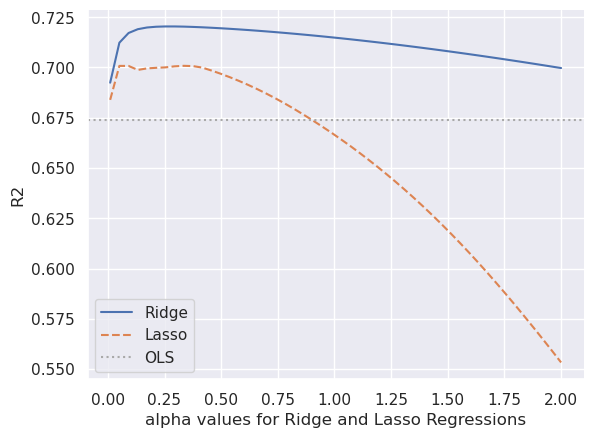

In [81]:
fig, ax = plt.subplots()
sns.lineplot(x="alpha", y="Ridge Regression", data = r2s, label="Ridge", linestyle='solid')
sns.lineplot(x="alpha", y="Lasso Regression", data = r2s, label = "Lasso", linestyle='dashed')
ax.axhline(olscv_score.mean(), label="OLS", linestyle='dotted', color="darkgray")
ax.set(xlabel='alpha values for Ridge and Lasso Regressions', ylabel='R2')
sns.despine()
ax.legend()
plt.show()

As you can see, all three of the model types we’re testing – ridge, lasso, and OLS
– converge as `alpha` approaches 0 (we didn’t actually fit any of the models with an
`alpha` of zero, since the models only accept non-negative, non-zero values for `alpha`),
but rapidly diverge thereafter. As `alpha` increases, lasso regression’s performance
increases, falters, and begins a nosedive as `alpha` approaches 0.5. Ridge regression
rises and falls like lasso regression, but over a much larger scale of `alpha`.

Although the peaks of ridge and lasso are close, it would appear that ridge regression
with a haphazardly optimized `alpha` parameter is our best fit for this model. We’ll
retrieve that value of `alpha`, fit a new model, and interpret the results:

In [82]:
best_alpha = alphas[ridge_r2s.index(max(ridge_r2s))]
best_alpha

0.2942857142857143

Let’s use this to fit a ridge regression and get the coefficients:

In [83]:
best_ridgereg = Ridge(best_alpha)
best_ridgereg.fit(X_train, y_train)

pd.DataFrame(
    [
        *best_ridgereg.intercept_, 
        *np.ravel(best_ridgereg.coef_)], 
    index=['Intercept', *X_test.columns]
)

,0
Intercept,22.769359
v2x_polyarchy,21.976134
v2x_libdem,20.601121
v2x_partipdem,22.536885
v2x_delibdem,5.303777
v2x_egaldem,7.585864


Now that we’ve developed a candidate model, validated it, and fit it to the available data,
we can assess its performance on the test data:

In [84]:
best_ridgereg.score(X_test, y_test)

0.7472740093285359

It doesn't look bad! Using weak regularization, we’ve created a ridge regression model that
outperforms our OLS model on the test data. The gains are modest, but measurable.

#### Model Interpretation

Let’s set aside more rigorous assessment for now and use our model to make
predictions on new data, or out-of-sample data. We do this using the `predict()`
method of the trained model. Below, we use our model to make predictions on the test
data, which we split away from the training data earlier:

In [85]:
predictions = np.round(best_ridgereg.predict(X_test))

In [86]:
np.ravel(predictions)

array([41., 40., 37., 34., 52., 82., 49., 33., 63., 49., 50., 73., 77.,
       51., 29., 34., 33.])

In [87]:
preds = pd.DataFrame({"Total Score": y_test['Total Score'], "Predicted Score": np.ravel(predictions), "Country":  vdem_fh.loc[y_test.index]['Country']})
preds

,Total Score,Predicted Score,Country
0,64,41.0,Angola
28,47,40.0,Jordan
62,24,37.0,Vietnam
29,32,34.0,Kazakhstan
23,55,52.0,India
10,87,82.0,Canada
30,68,49.0,Kenya
51,35,33.0,Thailand
36,60,63.0,Mexico
32,52,49.0,Lebanon


It looks good! Each of the predictions is off by a modest amount, but there’s only one truly
off-base prediction (Angola, with a difference of 23). Many predictions are very close!
Like most aspects of machine learning, linear regression isn’t a *one-size-fits-all* solution.
It’s a family of models with a variety of tweakable hyperparameters that deserve your
attention. If you put in the effort, you’ll likely be rewarded with a model that fits the data
well and is highly interpretable. That said, linear regression is not suitable for all tasks;
we will now take a look at a model better suited to classification tasks: **logistic regression**.

### CLASSIFICATION WITH LOGISTIC REGRESSION

When the goal is classification, logistic regression provides better results than the
models in the previous section. It’s also highly interpretable and can be used for binary
or multi-class classification problems. It’s a very flexible model, in part because it
doesn’t assume a linear relationship between the response variable and our explanatory
feature matrix. While similar to linear regression in many ways, rather than predict a
numerical outcome for a variable, logistic regression describes the probability that an
observation would have a particular value in a categorical variable. Logistic regression
is typically conducted using two classes, but it can also be extended to multiple classes.

Given that logistic regression is designed to answer different kinds of questions than
linear regression, we’re going to have to create a new set of training and test data. Let’s
say we want to predict whether a given country is governed democratically, as opposed
to autocratically. We have a variable from the VDEM dataset that will serve for this
purpose: it is a 4-point scale, with

- 0 representing closed autocracies,
- 1 representing electoral autocracies,
- 2 representing electoral democracies, and
- 3 representing liberal democracies.

We’re going to simplify this down to a 2-point scale, with **0** indicating **autocracies**, and **1**
indicating **democracies**. Using this recoding, we can use binary logistic regression to
predict the probability that any given country in our dataset belongs to one of the two
categories. Our predictions will be based on the five measures of internet freedom
drawn from the VDEM dataset, briefly discussed earlier in this notebook. We'll create our new X and y like this:

In [88]:
y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

X = vdem[[
                 'v2smgovdom_osp', 
                 "v2smgovfilprc_osp", 
                 "v2smgovsmcenprc_osp", 
                 "v2smonper_osp", 
                 "v2smarrest_osp", 
]]

Now we perform a new train–test split and estimate our binary logistic regression:

In [89]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
shuffsplit = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

log_reg = cross_val_score(
    LogisticRegression(), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg)
print(f"Mean: {log_reg.mean()}")

[0.96296296 0.85185185 0.88888889 0.85185185 0.7037037 ]
Mean: 0.8518518518518519


As before, we could use regularization to deal with underfitting and overfitting problems.
In this case, the parameter that controls regularization is called `C`. The logic is similar to
when we used `alpha`, but it goes in the opposite direction. Increasing the
value of `C` reduces regularization and results in more complex models that can learn
more from the training data. Decreasing `C` results in more regularization that constrains
how much the model can learn from the training data. So when we set a low value for `C`,
the logistic regression model will force the coefficients to be closer to 0, but not exactly 0. The code for accomplishing this is like this:

In [90]:
log_reg_regularized = cross_val_score(
    LogisticRegression(C=0.5), 
    X_train, 
    y_train, 
    cv=shuffsplit)
print(log_reg_regularized)
print(f"Mean: {log_reg_regularized.mean()}")

[0.96296296 0.85185185 0.88888889 0.85185185 0.7037037 ]
Mean: 0.8518518518518519


In this case, altering our regularization parameter didn’t help at all. Rather than bury this
result or massage it to produce a desirable outcome, we’re going to preserve this as a
reminder that using reasonable techniques in machine learning can often produce
uninteresting, uninformative, or confusing results.
Despite the roadblock we encountered here, it should be clear that it is relatively
straightforward to use linear and logistic regression models, with and without
regularization to prevent overfitting, within a supervised machine learning framework.
You might also have noticed that we did not need to write a lot of code to do the actual
learning.

### CONCLUSION

The key points in this section were as follows:

- We used Sklearn to set up, build, fit, and interpret supervised machine learning
models.

- We learnt how to prepare data by splitting our features into two different arrays, one
containing the labels we want to predict (quantitative or categorical) and the other
containing the values we want to use in our predictions.

- We learnt how to use cross-validation to remove the need for a separate validation
split and to harness the entire training set when tuning hyperparameters.

BOXES: REFER TO SUPPORT VECTOR MACHINES AND NAIVE BAYES CLASSIFICATION

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

## 9.3. Decision trees and random forests

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

<div class='alert alert-block alert-success'>
<b>TASK</b>

Copy the codes from https://github.com/UWNETLAB/dcss_supplementary/blob/main/chapter_notebooks/chapter_21.ipynb here. Note that the data called `forml` there is our data `vdem_fh`.
</div>

In the previous section, we worked with a few simple and relatively familiar supervised learning models. In this section we will continue that with some other types of models: **decision trees**, **ensemble learning**, **random forests**, and **gradient-boosted
machines**. We will finish with a description of model evaluation metrics, comparing
accuracy, precision, recall, and some ways we can make better use of these metrics.

#### The Train-Test Split and Cross-Validation

Same as the previous section, we will use the VDEM data on a country’s political and electoral freedoms to predict internet freedoms drawn from the Freedom House dataset. We will begin with splitting the data into train and test sets:

In [91]:
from sklearn.model_selection import train_test_split

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

### RULES-BASED LEARNING WITH TREES
#### Decision Trees

Decision trees can be used for both classification and regression tasks. Here we will focus on a classification example, but the process is more or less the same for the regression tasks.

A decision tree is in fact a directed network that starts with a single node including every instance in the data set. Beginning from that node, it *asks* a series of *questions* in order to find the correct labels in a classification problem, or the correct values in a regression problem. A good decision tree should ask the most informative questions in each step; we will see how it can be done shortly. The questions will always concern the value for
some specific feature for each instance, like *Does Canada hold free and fair
elections?* or *Is Canada’s score for freedom of the press higher than the median
score?*

Every time the model asks a question, a node containing some subset of instances in
our dataset splits off into two new nodes. Depending on the answer to the question,
each observation moves from the parent node into one of the two child nodes. This
process continues until 
- All of the observations contained in a node share the same value for the outcome you want the model to be able to predict, or
- Your tree model runs out of room to ask more questions.

The path from the root node
(every instance in the dataset) to each leaf in the tree constitutes a *rule*. We can collect
all of these rules into a single hierarchical rule base that is relatively easy for humans to
interpret and understand.

Now that we know the basics, it’s time to answer a critical question: *How does the
model decide which question to ask next?* How does it know what the *most informative*
question is? The most common method is to use the concept of entropy from
information theory. In information theory, entropy is a measure of how much information
something contains, expressed in terms of uncertainty.

To use a simplified example, let’s say we want to figure out which of the nations in the
VDEM dataset are democracies. If you think elections are all you need to be considered
a democracy, then you could just ask one question for each case – do they hold
elections? *However*, not all elections are the same, and democracies are about much
more than elections. So you keep asking questions until you are confident you can
make a good judgement. The more questions you need to ask to arrive at a confident
judgement, the more accurate your classification of the observations into "democracies"
and "autocracies" will be. The more purely separated those two classes become, the
lower the "entropy" in your model. In the context of a decision tree analysis, the model
will *always* ask the question that will result in the biggest decrease in entropy, usually
expressed in terms of **information gain**, which quantifies the decrease in entropy that
resulted from asking the question.

At this point, there shouldn’t be much doubt about how easily the VDEM dataset we’ve
been using up until here can be classified; nevertheless, we are going to use it
here again. We are not going to do so because it will provide us with a better
classification (we already achieved very good scores using a logistic regression) but
rather because the resultant decision tree model will allow us to easily see what
information the model finds most useful when deciding whether a nation is an autocracy
or a democracy.

As usual, we will start by splitting our dataset into a matrix `X` and and outcome vector `y`:

<div class='alert alert-block alert-danger'>
<b>NOTE:</b>
    
I used `vdem` instead of `dem_indices` in the follwoing cells. Let me know if it is incorrect, so that I will modify it. 
</div>

In [92]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from sklearn.preprocessing import LabelEncoder

# dem_indices = pd.read_csv("../data/vdem_internet_freedom_combined/dem_indices.csv")

X = vdem[[
                 'v2smgovdom_osp', # Government dissemination of false information domestic
                 "v2smgovfilprc_osp", # Government internet filtering in practice
                 "v2smgovsmcenprc_osp", # Government social media censorship in practice
                 "v2smonper_osp", # Diversity of online media perspectives (0 = gov't only, 4 = any perspective)
                 "v2smarrest_osp", # Arrests for political content disseminated online
]]

interpretable_names = [
    'Domestic Misinformation',
    'Internet Filtering',
    'Social Media Censorship',
    'Online Media Diversity',
    'Arrests for Political Content'
]

regime_types = [
    'Autocracy',
    'Democracy',
]


le = LabelEncoder()
labels = le.fit_transform(regime_types)

y = np.where(vdem["v2x_regime"] <= 1, 0, 1).copy()

The technique we’re using to convert the 4-point `v2x_regime` scale into a binary
variable is identical to the one we employed in the previous section.
With `X` and `y` created, we can create our training and test sets, and then create and fit
our decision tree classifier using cross-validation (in much the same way as we did in
the previous section; go back to it for more details on cross-validation).

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

shuffsplit = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

dtclass = DecisionTreeClassifier(random_state=0)
dt_scores = cross_val_score(dtclass, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

[0.68292683 0.73170732 0.7804878  0.75609756 0.82926829]
Mean: 0.7560975609756098


In order to get a sense of what our tree is doing under the hood, the below picture
represents our decision tree. You start at the top node, which contains all of the
observations (countries in this case). The top line in that node (and every non-leaf node
in the remainder of the tree) indicates the rule it will use to split the data. All of the
countries for which that statement is true will travel along the **True** path for further
subdivision. All of the nations for whom this condition does not apply travel along the
**False** path.

<img src='images/decisiontree1.jpg' style='height: 700px; float: left'>

In [94]:
# vdem.v2x_regime

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [99]:
# To be added: wrapping in graphviz.Source()

In [98]:
from sklearn import preprocessing

dt_fitted = dtclass.fit(X_train, y_train)

export_graphviz(
    dtclass,
    out_file='../graphical_models/classified_1.gv', 
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

#### What About Overfitting?

Decision trees are also prone to overfitting. The tree grows bigger with every question, and by the time we’ve reached the leaves, we know
everything we need to know to make predictions that are 100% right 100% of the time -*for the data we trained the model on*. This extreme overfitting is sometimes called
**memorizing** the training data. We don’t want that!

One way to address the overfitting problem with decision trees is to **prune** them.
Remember that the model *always* asks the most informative question first. This means
that as the trees get deeper and deeper (as we ask more questions), each feature is
weaker or less predictive than those that came before it. As we move further and further
out, we risk making decisions based on noise and overfitting the model to the data we
have. The full tree, then, is typically *worse* than a pruned tree because it includes weak
features that could be specific to our dataset and which do not generalize.

We constrain the depth of the tree by restricting the number of questions or decisions
that the model is allowed to ask, and in doing so, we improve the ability of our model to
generalize to data it hasn’t seen before. If we set the maximum depth of our tree to 6,
for example, the models can only ask the six most informative questions, at which point
it must make its prediction. Obviously, this reduces the accuracy on the training data,
but not as much as you might think. It’s the unseen data we care most about, and the
pruned model will make much better predictions when it is not overfitted.

In Sklearn, we specify the maximum depth of the tree in advance. This can be done using the `max_depth` argument for the `DecisionTreeClassifier()`. Let’s set it to 3. This will produce a very shallow tree, but that’s desirable; we want it to have to make the best decisions it can in broad strokes. This way, the model will be less likely to overfit the training data.

In [ ]:
dtclass_pruned = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_scores = cross_val_score(dtclass_pruned, X_train, y_train, cv=shuffsplit)
print(dt_scores)
print(f"Mean: {dt_scores.mean()}")

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
dtclass_pruned.fit(X_train, y_train)

export_graphviz(
    dtclass_pruned,
    out_file='../graphical_models/pruned.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

In [ ]:
dtclass_pruned.score(X_test, y_test)

We’ve already seen a modest improvement, which probably represents a
slight reduction in overfitting (something that cross-validation automatically assesses).
Let’s examine the tree again:


<img src='images/decisiontree2.jpg' style='height: 400px; float: left'>

You can see the influence of setting the `max_depth` parameter to 3 in the tree: rather
than a sprawling monstrosity, we now have a tree that neatly terminates each branch at
the same level. Decision trees have other parameters you can tweak, such as `min_samples_leaf`; it’s worth looking at the documentation to see the options available to you! Using only `max_depth`, we managed to get a good result, but we’re unlikely to be able to do much better using regularization alone. As we saw with ridge
and lasso regression, regularization usually reaches a "sweet spot" at some modest
value, but as the strength of the regularization increases, the model’s performance
nosedives. Decision trees have, by their nature, low granularity. You can’t perform fine-grained regularization on a single decision tree the same way you could for an `alpha`
parameter on a ridge or lasso regression (what would a `max_depth` of 3.5 even look
like?). It’s likely that no regularization of a single-tree model will eliminate overfitting
entirely. Instead, we’ll have to turn to a method which will allow us to combine many,
many trees.

### ENSEMBLE LEARNING

In order to tackle the overfitting problem, an effective way is to use an ensemble approach, which combines predictions from multiple models into a single prediction that
is better than that of any individual model. As you will soon learn, this approach tends to
produce excellent results and does not require any pruning. Ensembles of decision
trees produce better results than any one decision tree, including any of the individual
decision trees in the ensemble.

To work with an ensemble of decision trees, we first draw many bootstrapped samples
of instances from our overall dataset. In a bootstrapped sample, replacement is allowed,
which means that the same instance can be sampled more than once. For each sample,
we fit a decision tree and record the model’s predictions. The final predictions are made
by an *election* of sorts, where each tree *votes* on the class they think each
observation belongs to. If we take 200 samples, we would fit 200 decision trees. These
modes are used collectively -as an ensemble- to make predictions on new instances
by taking averages of the predictions made by the models that make up the ensemble.
This process is called **bagging** or **bootstrapped aggregation**, and it can be applied not
only to decision trees but also to a wide variety of the classification models implemented
in scikit-learn. For now, we will stick to applying it to decision trees.

Bagging or bootstrapped aggregation goes a very long way in addressing the overfitting
problem. One major advantage is that we don’t have to prune our decision trees. In fact,
it’s better if we don’t! If we let each tree grow to be as deep and complex as it likes, we
will end up with an ensemble that has high variance but low bias. That’s exactly what we
want when we go to make our final aggregated predictions. The important choice you
must make is how many bags to use, or rather, how many bootstrapped samples of
instances to draw, and the number of total trees we want to end up with. Let’s see what
the combination of 100 trees can bring us:

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_of_trees = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=100,
                                bootstrap=True,
                                random_state=0)

bt_scores = cross_val_score(bag_of_trees, X_train, y_train, cv=shuffsplit)
print(bt_scores)
print(f"Mean: {bt_scores.mean()}")

The unregularized bagging classifier has produced an even better score than the
regularized decision tree did! There may yet be more room for improvement if we alter
how each of the trees functions using a random forest model.

#### Random Forests

One issue with the bagging approach is that the resulting trees tend to be correlated
with one another, mainly due to the fact that they are all trying to maximize the same
thing when they ask questions – information gain. If there are some very powerful
attributes in our dataset, as there almost always are, the tree we fit for each bag will
lean heavily on those features, which makes the whole ensemble approach a lot less
useful and degrades the quality of the final prediction. It would be much better for us if
the trees are not correlated, or are at best weakly correlated.

Random forests accomplish this with one simple, but highly effective, modification: *they
constrain the features that any given node is allowed to ask questions about*. The result
is a collection of decision trees that are uncorrelated, or weakly correlated, with one
another, which leads to more accurate predictions when they are aggregated.

Random forests are straightforward to train, and because of their clever design, they do
a good job of dealing with noise and preventing overfitting, so it is not necessary to trim
or prune the trees. They also take only two hyperparameters: **the number of trees in the
forest** (i.e. the number of samples of instances to draw) and **the size of the random
sample** to draw when sampling the features that any given decision tree will select from.
You can and should experiment with cross-validation to select values for these
hyperparameters that result in the most accurate predictions (we’re not doing so here
because space is limited).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100,
                                max_features=2,
                                random_state=0)

rforest_scores = cross_val_score(rforest, X_train, y_train, cv=shuffsplit)
print(rforest_scores)
print(f"Mean: {rforest_scores.mean()}")

It would appear that our random forest model, with modest parameters, is producing the
*exact same result* as we got with our bagging classifier.

The downside of random forests is that – unlike garden-variety decision trees – the
results are not so easy to interpret. For this reason, random forests and other ensemble
models are generally considered to be less *interpretable* than simple decision trees,
linear and logistic regressions, or k-nearest neighbours. While you can inspect any of
the trees in your random forest classifier, this process is complicated somewhat by the
fact that our model contains 100 distinct trees, and we can’t easily determine how
significant any one tree was to the overall decision-making process. Nevertheless, it’s a
good idea to select a a tree at random and take a look at what it did with the data. Of
course, you can do this many different times, if you like. Just select different trees each
time. One such tree is shown the following picture:

<div class='alert alert-block alert-danger'>
<b>TO DOUBLE CHECK:</b>
    
The output directory! 
</div>

In [ ]:
rforest.fit(X_train, y_train)

export_graphviz(
    rforest.estimators_[6],
    out_file='../graphical_models/rf_classified.gv',
    filled=False,
    rounded=True,
    feature_names=interpretable_names,
    class_names=le.classes_,
)

<img src='images/decisiontree3.jpg' style='height: 600px; float: left'>

### Gradient Boosted Machines

While random forests remain one of the best and most widely used approaches to
supervised machine learning, a slightly newer approach to ensembling decision trees
has recently started outperforming random forests and is widely considered to be one of
the best algorithms for doing machine learning on anything other than image or
perception data (Chollet, 2018). This technique is called **gradient boosting**, and it
differs from the random forest approach in that rather than allowing all of the decision
trees to randomly pursue the best answer possible in isolation (as random forest does),
it attempts to fit trees that better account for the misclassified observations from
previous trees. In this way, each tree tackles the *room for improvement* left behind by
the tree that immediately preceded it. The effect here is that the gradient-boosted trees
can reach a remarkably high degree of accuracy using only a small handful of
estimators (but are accordingly prone to overfitting). Let’s try creating one now:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(n_estimators=100,
                                random_state=0)

gboost_scores = cross_val_score(gboost, X_train, y_train, cv=shuffsplit)
print(gboost_scores)
print(f"Mean: {gboost_scores.mean()}")

The gradient-boosted trees achieved worse performance than our previous two models.
Usually, we would expect a gradient-boosted trees model to outperform all of our other
decision tree models (ensemble or otherwise), but that shouldn’t be interpreted as a
good reason to skip straight to gradient boost without bothering to specify and fit any
other models. What we’ve seen here is evidence to that point; there is value in fitting
*intermediate* models to see how their performance and idiosyncrasies compare to the
cutting-edge techniques. There are a few reasons why this is a vital practice.

- *Advanced, complicated methods are not intrinsically better than simple methods*: not
only is this true in our example – given that one of the most demonstrably powerful and
widely applicable algorithms, gradient boosting, failed to outperform random forests –
but it is often true in general. Cutting-edge methods are indispensable for their ability to
tackle cutting-edge issues, but they’re often overkill for the kinds of problems they get
applied to.

- *Don’t sacrifice interpretability without good cause*: explicable, interpretable, transparent
models that slightly underperform are often more valuable than top-performing ‘black
box’ models that appear to be more accurate, but for reasons that are hard to establish.
Gradient-boosted models are more difficult to interpret than decision tree models, so the
advantages of the former over the latter should be considered in light of the
interpretability trade-off.

- *Any problem in machine learning should be tackled using multiple approaches*: even if
you feel like you can’t improve on your model, there may be undiscovered issues lurking
beneath the surface. Applying a multitude of modelling strategies to a problem – even in
cases where your first model is performing well – may help confirm the defensibility of
your primary approach, give you more inferential insight, or uncover contingencies that
need to be addressed.

One problem common to all tree-based models (ensemble or otherwise) is that they
require an abundance of data and are especially prone to overfitting in cases where
such data is not forthcoming. There are different ways to make up for a lack of
data.

Before we move on, let’s take a moment to compare how each of our tree-based
models perform on the test set which we split off from the training data right at the
beginning of this section and haven’t touched since:

In [ ]:
model_list = [dtclass,
dtclass_pruned,
bag_of_trees.fit(X_train, y_train),
rforest,
gboost.fit(X_train, y_train)]

for model in model_list:
    print(model.score(X_test, y_test))

Looks like the training results match up nicely with the test results.

### Evaluation Beyond Accuracy
### Balancing False Positives and False Negatives in Classification Models
### Improving Binary Classification with Curves
#### Precision-Recall Curves
#### Beyond Binary Classifiers
### CONCLUSION
#### Key Points

## 9.4. Towards deep learning

Check https://doi.org/10.1073/pnas.1218772110

- Convey an understanding of neural networks and deep learning
- Start by extendin features by hashtag/named entity/mention representations
- Use neural network off the sklearn shelf

<div class='alert alert-block alert-success'>
<b>TASK</b>

Implement a neural network regression (https://scikit-learn.org/stable/modules/neural_networks_supervised.html#regression) for the same data used above. Take notes on potential overfitting.
</div>

### Multi-layer Perceptron (MLP)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

X = vdem_fh[['v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem', 'v2x_egaldem',]]
y = vdem_fh[['Total Score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2023)

In [11]:
regressor = MLPRegressor(random_state=1,hidden_layer_sizes=(2,) , max_iter=500).fit(X_train, y_train)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
cv_scores = cross_val_score(regressor, X_train, y_train, cv = 5)

/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sed_zeppelin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer:

In [15]:
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))

Cross-validation scores: [-6.98666986 -6.99124744 -5.98488825 -7.60877268 -5.85182062]
Average cross-validation score: -6.68
Standard deviation of cross-validation scores: 0.67


## 9.5. Model selection

- By interpretability
- By predictive accuracy

#### Notes to be removed before publication

- add cvxopt=1.2.6 to environment.yml -- NOT NECSSARY ANYMORE CAUSE WE DON'T USE method=sqrt_lasso IN statsmodels RIDGE REGRESSION ANYMORE
- https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py
- ...